In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [15]:
picture_size = 48
folder_path = "C:/Users/konrupes/Documents/GitHub/Emotion_detection_with_CNN/Data/"

In [16]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


In [ ]:
# from tensorflow.keras.optimizers import Adam,SGD,RMSprop


# no_of_classes = 5

# model = Sequential()

# #1st CNN layer
# model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# #2nd CNN layer
# model.add(Conv2D(128,(5,5),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #3rd CNN layer
# model.add(Conv2D(512,(3,3),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# #Fully connected 1st layer
# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))


# # Fully connected layer 2nd layer
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(Dense(no_of_classes, activation='softmax'))



# opt = Adam(lr = 0.0001)
# model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


In [5]:
# from tensorflow.keras.optimizers import RMSprop,SGD,Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./dummy.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

# epochs = 48

# model.compile(loss='categorical_crossentropy',
#               optimizer = Adam(lr=0.001),
#               metrics=['accuracy'])

In [9]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
# history = model.fit_generator(generator=train_set,
#                                 steps_per_epoch=train_set.n//train_set.batch_size,
#                                 epochs=epochs,
#                                 validation_data = test_set,
#                                 validation_steps = test_set.n//test_set.batch_size,
#                                 callbacks=callbacks_list
#                                 )

In [17]:
# history = model.fit_generator(
#         train_set,
#         steps_per_epoch=24176 // 64,
#         epochs=48,
#         validation_data=test_set,
#         validation_steps=6043 // 64)

In [18]:
no_of_classes = 5

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])


In [19]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


C:\Users\konrupes\AppData\Local\Temp/ipykernel_22924/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


188/188 [==============================] - 178s 944ms/step - loss: 2.6650 - accuracy: 0.2894 - val_loss: 1.5729 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 2/48
188/188 [==============================] - 186s 991ms/step - loss: 1.5705 - accuracy: 0.3009 - val_loss: 1.5730 - val_accuracy: 0.2957 - lr: 0.0010
Epoch 3/48
188/188 [==============================] - 185s 985ms/step - loss: 1.5718 - accuracy: 0.2990 - val_loss: 1.5734 - val_accuracy: 0.2952 - lr: 0.0010
Epoch 4/48
188/188 [==============================] - 183s 974ms/step - loss: 1.5715 - accuracy: 0.2996 - val_loss: 1.5699 - val_accuracy: 0.3002 - lr: 0.0010
Epoch 5/48
188/188 [==============================] - 192s 1s/step - loss: 1.5715 - accuracy: 0.3001 - val_loss: 1.5704 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 6/48
188/188 [==============================] - 241s 1s/step - loss: 1.5703 - accuracy: 0.3029 - val_loss: 1.5723 - val_accuracy: 0.2977 - lr: 0.0010
Epoch 7/48
188/188 [==============================] - ETA: 0s -

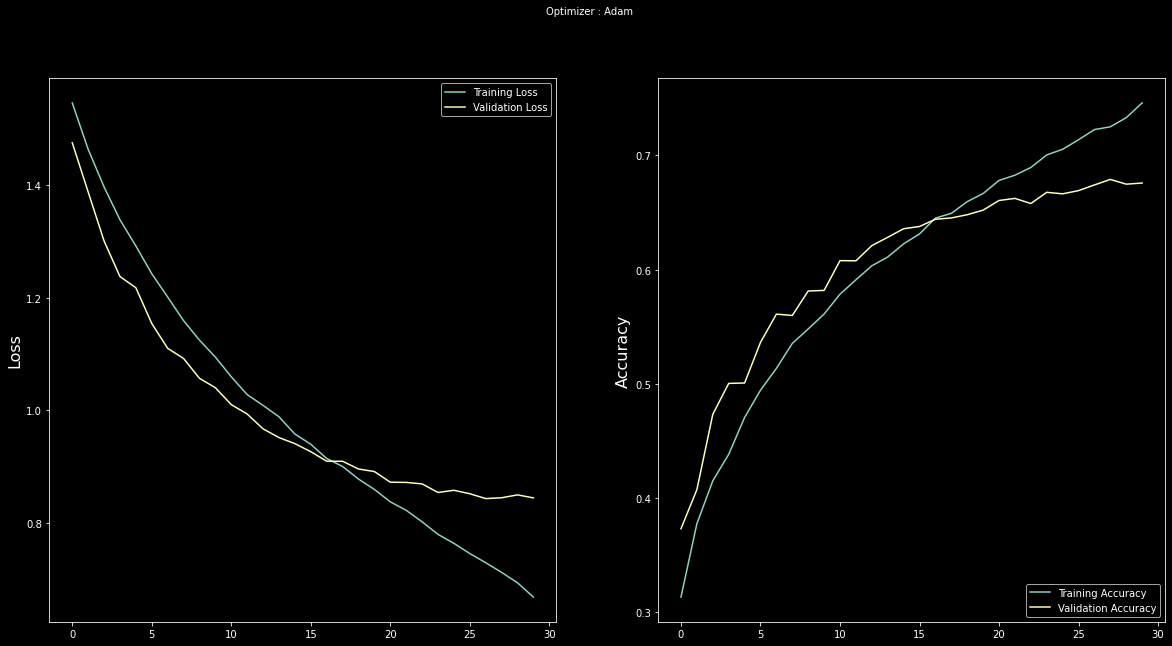

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [8]:
predictions = model.predict_generator(test_set, 6043 // 64)
predictions = np.argmax(predictions, axis=1)

NameError: name 'model' is not defined

Confusion Matrix


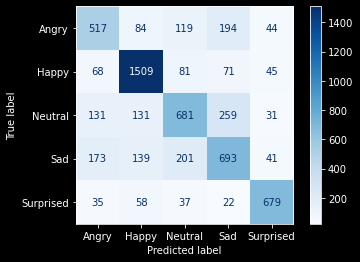

In [43]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

emotion_dict = {0: "Angry",1: "Happy", 2: "Neutral", 3: "Sad", 4: "Surprised"}
c_matrix = confusion_matrix(test_set.classes, predictions)
print('Confusion Matrix')
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Angry","Happy","Neutral","Sad","Surprised"])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


In [3]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
print(classification_report(test_set.classes, predictions))

NameError: name 'test_set' is not defined